In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

1.9685144403960946 0.0007238369643240983


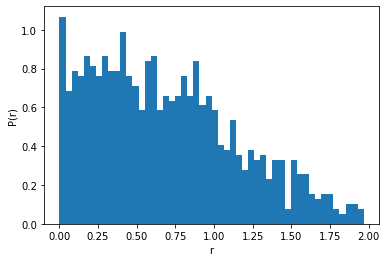

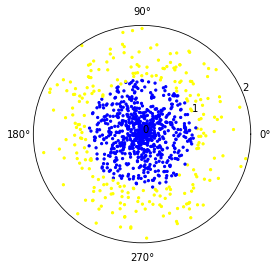

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function P(r, theta)
def P(r, theta):
    return -0.5 * r + 1

# Set the number of Monte Carlo samples
n_samples = 1000

# Generate a set of random values for u using the inverse transform method
u = np.random.uniform(size=n_samples)
r = 2 - 2 * np.sqrt(1 - u)

print(r.max(), r.min())

# Generate a set of random values for theta using a uniform distribution
theta = np.random.uniform(0, 2*np.pi, size=n_samples)

# Combine r and theta to obtain Monte Carlo samples (r, theta)
samples = np.column_stack((r, theta))

# Plot the resulting distribution of r
plt.hist(r, bins=50, density=True)
plt.xlabel('r')
plt.ylabel('P(r)')
plt.show()

# Assign labels based on radius r
labels = np.where(r <= 1, 'blue', 'yellow')

# Plot the resulting distribution of (r, theta) as a scatter plot with noise
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.scatter(theta, r, s=5, c=labels)
ax.set_rticks([0, 1, 2])
# Remove the angle scales
ax.set_thetagrids([0,90,180,270])
ax.set_rlim(0, 2) # Set the limits of the radial axis
# Remove the grid lines
ax.grid(visible=False)
plt.show()


In [26]:
def linear_pdf_generator(k, b, x_right_bound):
    """
    Generate one dimensional linear probability density function p(x) = nor_factor * (k * x + b), 
    along with pdf_quantile(u) function for the inverse transform method to generate p(x) distribution.
    nor_factor is a normalization factor.
    
    Arguments:
    ---------
        k:  'float'
        b:  'float'
        x_right_bound: 'float'
                       The right boundary of the x-axis.
    Returns:
    -------
        pdf:  'function'
             Linear probability density function p(x). 
        pdf_quantile: 'func'
                    pdf_quantile(u) function for the inverse transform method to generate p(x) distribution.
                    u is uniform distributed random numbers.
        x_range: 'list'
                  The range of x after normalization.
    
    """
    if b < 0:
      raise ValueError("b must be non-negative.")

    if np.logical_and(k < 0, - b/k < x_right_bound):
       
       x_right_bound = - b/k
       nor_factor  = 1/ ( 0.5 * x_right_bound * b)

    else:

      nor_factor = 1/ ( 0.5 * x_right_bound * (k * x_right_bound + 2 * b) )

    pdf = lambda x: nor_factor * (k * x + b)
    pdf_quantile = lambda u: (- b + np.sqrt(b ** 2 + 2 * nor_factor * k * u) )/ (nor_factor * k)
    x_range = [0, x_right_bound]

    return pdf, pdf_quantile, x_range

In [27]:
def gaussian_pdf_generator(mu, sigma, x_right_bound):
    """
    Generate one dimensional Gaussian probability density function p(x) = \frac{1}{sigma \sqrt{2 \pi}} * exp(- 0.5 * \frac{(x-/mu)^2}{\sigma ^ 2}) ,
    along with pdf_quantile(u) function for the inverse transform method to generate p(x) distribution. 
    
    Arguments:
    ---------
        mu:  'float'
             mean of Gaussian distribution.
        sigma:  'float'
             standard deviation of Gaussian distribution.
        x_right_bound: 'float'
                       The right boundary of the x-axis.

    Returns:
    -------
        pdf:  'function'
             Linear probability density function p(x). 
        pdf_quantile: 'func'
                    pdf_quantile(u) function for the inverse transform method to generate p(x) distribution.
                    u is uniform distributed random numbers.
        x_range: 'list'
                  The range of x after normalization.
    
    """
    if x_right_bound <= 0:
        raise ValueError("x right boundary must be positive.")
    
    # Define Gaussian pdf
    pdf = lambda x: (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x-mu)**2 / (2*sigma**2))

    # Define cumulative distribution function for normalized pdf
    pdf_cdf = lambda x: 0.5 * (1 + erf((x-mu) / (sigma*np.sqrt(2))))
    
    # Define the quantile function for the pdf
    pdf_quantile = lambda x: mu + sigma * np.sqrt(2) * erfinv(2*u - 1)

    x_range = [0, x_right_bound]

    return pdf, pdf_quantile, x_range


In [28]:
def MC_generator(n_samples, pdf_type, params):
    """
    Monte Carlo generator for given probability density functions.

    Arguments:
    ---------
        n_samples:  'int'
                    Number of Monte Carlo samples.
        pdf_type: 'str'
                  The type of density distribution function for one dimension
        params: 'dict'        
                Required parameters for different types of pdf generator.
    Returns:
    -------
        data:  'numpy.ndarray'
               n_samples of Monte Carlo data points.
    """
    if pdf_type not in ['Linear', 'Gaussian']:
       raise ValueError('pdf_type is not included in current package')
    if pdf_type == 'Linear':
       k, b, x_right_bound = params.values()
       pdf, pdf_quantile, x_range = linear_pdf_generator(k, b, x_right_bound)
       
    
    if pdf_type == 'Gaussian':
       mu, sigma, x_right_bound = params.values()
       pdf, pdf_quantile, x_range = gaussian_pdf_generator(mu, sigma, x_right_bound)
    
    return pdf, pdf_quantile, x_range


In [29]:
def plot_data(n_samples, pdf_type, params):
    
    pdf, pdf_quantile, x_range = MC_generator(n_samples, pdf_type, params)
    # Generate a set of random values for u using the inverse transform method

    u = np.random.uniform(size=n_samples)
    r = pdf_quantile(u)

    print(r.max(), r.min())

    # Generate a set of random values for theta using a uniform distribution
    theta = np.random.uniform(0, 2*np.pi, size=n_samples)

    # Combine r and theta to obtain Monte Carlo samples (r, theta)
    samples = np.column_stack((r, theta))

    # Plot the resulting distribution of r
    plt.hist(r, bins=50, density=True)
    plt.xlabel('r')
    plt.ylabel('P(r)')
    plt.show()

    # Assign labels based on radius r
    labels = np.where(r <= 1, 'blue', 'yellow')

    # Plot the resulting distribution of (r, theta) as a scatter plot with noise
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    ax.scatter(theta, r, s=5, c=labels)
    ax.set_rticks([0, 1, 2])
    # Remove the angle scales
    ax.set_thetagrids([0,90,180,270])
    ax.set_rlim(0, 2) # Set the limits of the radial axis
    # Remove the grid lines
    ax.grid(visible=False)
    plt.show()
    


2.983085393054175 -3.685025615196916


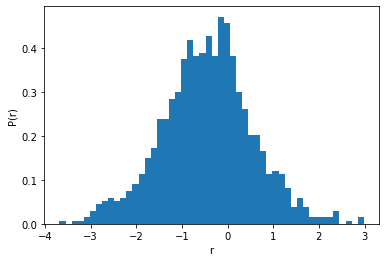

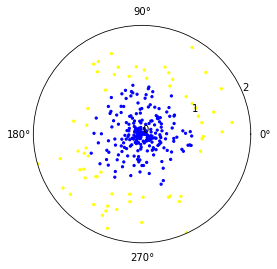

In [30]:
n_sample = 100000000,
pdf_type = "Gaussian"
params = {'k': -0.5, 'b': 1, 'x_right_bound': 5}
params1 = {'mu': 0, 'sigma': 0.5, 'x_right_bound': 5}

plot_data(n_samples, pdf_type, params)

0.00026766045152977074

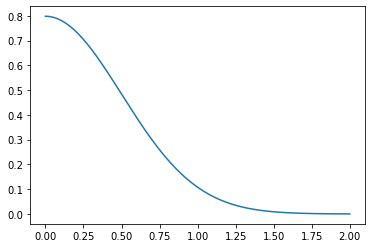

In [31]:
pdf, pdf_quantile, x_range = MC_generator(n_samples, pdf_type, params1)
u = np.random.uniform(size=n_samples)
x = np.linspace(0,2,1000)
y = pdf(x)

plt.figure()
plt.plot(x,y)
pdf(2)

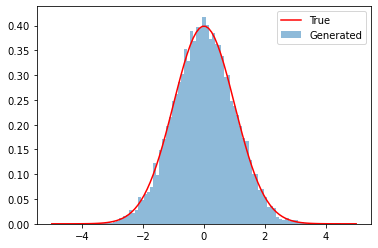

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the Gaussian distribution
mu = 0.0  # mean
sigma = 1.0  # standard deviation

# Define the probability density function (PDF) of the Gaussian distribution
def gaussian_pdf(x):
    return (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x-mu)**2 / (2*sigma**2))

# Compute the cumulative distribution function (CDF) of the Gaussian distribution
def gaussian_cdf(x):
    return 0.5 * (1 + erf((x-mu) / (sigma*np.sqrt(2))))

# Define the inverse of the CDF (using the inverse error function)
def gaussian_inverse_cdf(u):
    return mu + sigma * np.sqrt(2) * erfinv(2*u - 1)

# Generate random numbers from the Gaussian distribution using the inverse transform method
n_samples = 10000
u = np.random.rand(n_samples)
x = gaussian_inverse_cdf(u)

# Plot the histogram of the generated samples
bins = np.linspace(-5, 5, 100)
plt.hist(x, bins=bins, density=True, alpha=0.5, label='Generated')
plt.plot(bins, gaussian_pdf(bins), 'r-', label='True')
plt.legend()
plt.show()


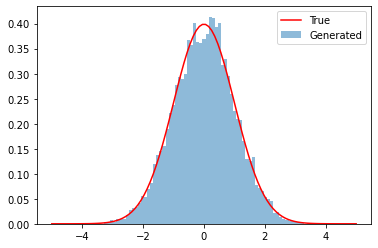

In [33]:
from scipy.stats import norm

# Generate random numbers from the Gaussian distribution using scipy.stats.norm
n_samples = 10000
x = norm.rvs(loc=mu, scale=sigma, size=n_samples)

# Plot the histogram of the generated samples
bins = np.linspace(-5, 5, 100)
plt.hist(x, bins=bins, density=True, alpha=0.5, label='Generated')
plt.plot(bins, gaussian_pdf(bins), 'r-', label='True')
plt.legend()
plt.show()


In [ ]:
class Simulator:
    
    def __init__(self, n_samples):
        self.n_samples = n_samples
    
    def MC_generator(n_samples, pdf_type, params):
        """
        Monte Carlo generator for given probability density functions.

        Arguments:
        ---------
            n_samples:  'int'
                        Number of Monte Carlo samples.
            pdf_type: 'str'
                    The type of density distribution function for one dimension
            params: 'dict'        
                    Required parameters for different types of pdf generator.
        Returns:
        -------
            data:  'numpy.ndarray'
                n_samples of Monte Carlo data points.
        """
        if pdf_type not in ['Linear', 'Gaussian']:
            raise ValueError('pdf_type is not included in current package')
        if pdf_type == 'Linear':

            k, b, x_right_bound = params.values()
            pdf, pdf_quantile, x_range = linear_pdf_generator(k, b, x_right_bound)
          
        if pdf_type == 'Gaussian':
            mu, sigma, x_right_bound = params.values()
            pdf, pdf_quantile, x_range = gaussian_pdf_generator(mu, sigma, x_right_bound)
        
        return pdf, pdf_quantile, x_range